In [42]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from AbundanceMatching import *
import emcee, os
import numpy as np
from Corrfunc.theory import wp

from galaxy_statistics import generate_wp,comp_deconv_steps,AMLikelihood
from astropy.io import fits

custom_colors = ["#a1dab4","#41b6c4","#2c7fb8","#253494"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
def get_wp_data(wp_data_path,mag_cut,r_cutoff):
    # Load wp
    wp = np.loadtxt(os.path.join(data_path,'wp_%d.dat'%(mag_cut)))
    
    # Load the covariance matrix and deal with the weird formatting
    wp_cov_temp = np.loadtxt(os.path.join(data_path,'wp_covar_%d.dat'%(mag_cut)))
    wp_cov = np.zeros((len(wp),len(wp)))
    for wp_tup in wp_cov_temp:
        wp_cov[int(wp_tup[0])-1,int(wp_tup[1])-1] = wp_tup[2]
        wp_cov[int(wp_tup[1])-1,int(wp_tup[0])-1] = wp_tup[2]
    
    # Apply the cutoff on radius
    wp_cov=wp_cov[wp[:,0]<r_cutoff,:]
    wp_cov=wp_cov[:,wp[:,0]<r_cutoff]
    wp_var = np.diag(wp_cov)
    wp = wp[wp[:,0]<r_cutoff]
    
    return wp, wp_cov, wp_var

In [34]:
data_path = '/Users/sebwagner/Documents/Grad_School/Research/Risa/abundancematching/data/'
# Luminosity function
# lf_21 = np.loadtxt(data_path + 'lf/tinker/lf_jt_21.dat')
lf_20 = np.loadtxt(data_path + 'lf_jt_20.dat')
lf_18 = np.loadtxt(data_path + 'lf_jt_18.dat')
# lf_21 = lf_21[lf_21[:,1]>0,:]
lf_20 = lf_20[lf_20[:,1]>0,:]
lf_18 = lf_18[lf_18[:,1]>0,:]

# Load the wp data.
wp_path = data_path
r_cutoff = 15
wp_20, wp_20_cov, wp_20_var = get_wp_data(wp_path,20,r_cutoff)
wp_18, wp_18_cov, wp_18_var = get_wp_data(wp_path,18,r_cutoff)
wp_21, wp_21_cov, wp_21_var = get_wp_data(wp_path,21,r_cutoff)

box_size = 400
pimax = 40.0
scatters = [0.1,0.2,0.3]
deconv_repeat = 200
mag_cuts=[-21.0,-20.0,-18.0]

# Use lf_20 twice since we don't have an lf_21
lf_list = [lf_20,lf_20,lf_18]

# Halos from n body sim
halo_path = '/Users/sebwagner/Downloads/'
# halos = np.array(fits.open(halo_path + 'hlist_1.00000.list.fits')[1].data)
r_p_data = wp_20[:,0]
wp_data_list = [wp_21[:,1],wp_20[:,1],wp_18[:,1]]
wp_cov_list = [wp_21_cov,wp_20_cov,wp_18_cov]

### First plot the two point correlation functions we extracted to make sure they're reasonable

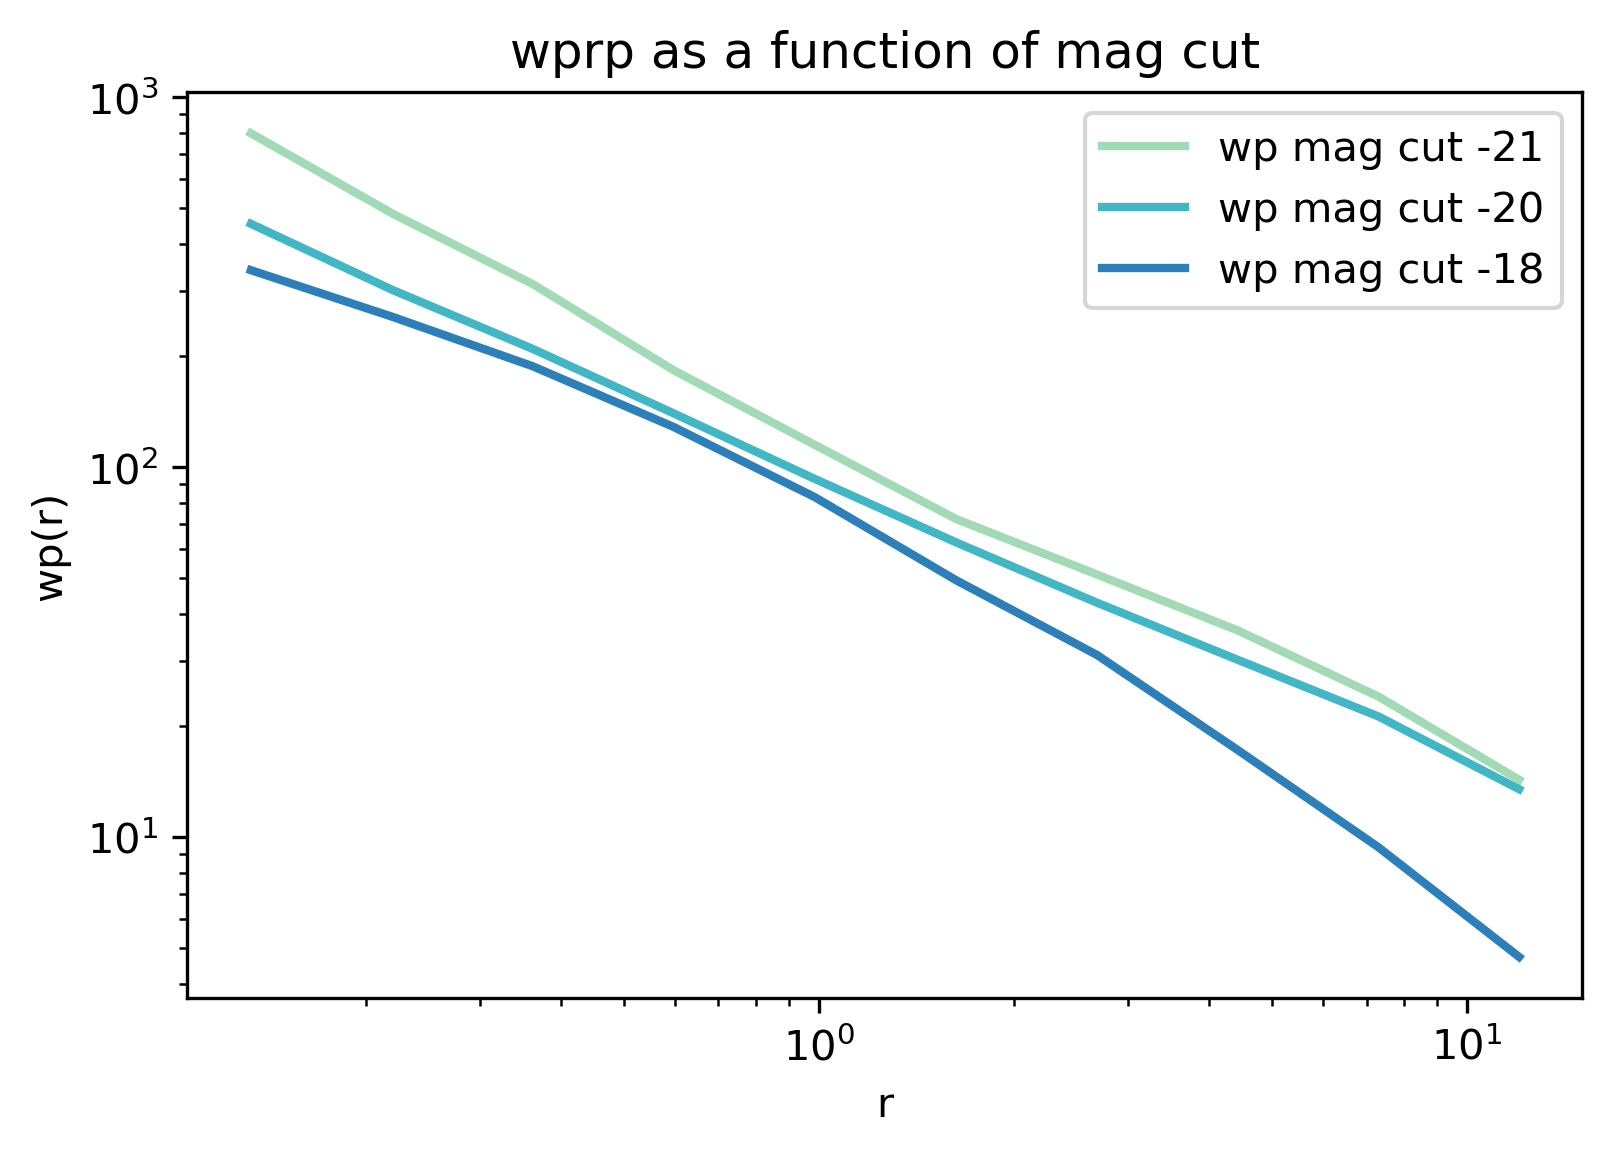

In [49]:
legend = []
plt.figure(dpi=300)
for mi,mag in enumerate(mag_cuts):
    plt.plot(r_p_data,wp_data_list[mi],c=custom_colors[mi],lw=2)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('r')
    plt.ylabel('wp(r)')
    legend.append('wp mag cut %d'%(mag))
plt.legend(legend)
plt.title('wprp as a function of mag cut')
plt.show()

In [ ]:
wp_binneds = generate_wp(lf_list,halos,'vmax',wp_20[:,0],box_size,mag_cuts=mag_cuts,pimax=pimax,scatters=scatters,
                    deconv_repeat=deconv_repeat,verbose=True)